In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
##Generar un archivo PKL
import pickle 
#sys.path.insert(1, '/home/yeshua/Documentos/repositorios/T_proyect')
sys.path.insert(1, 'C:\\Users\\gojiy\\Documents\\tesis\\repositorios\\T_proyect')
import utiles

# RAW

In [3]:

path_file = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\"
namefile = "OPTOa20230622s02_RAW.h5"


file_raw = h5py.File(path_file+namefile)

In [4]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0'].keys()

<KeysViewHDF5 ['ChannelData', 'ChannelDataTimeStamps', 'InfoChannel']>

In [5]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']

<HDF5 dataset "ChannelData": shape (120, 6000000), type "<i4">

In [6]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][1][0:100]

array([ -64, -128,  -87,   -9,   30,   18,   36,   28,  -50,  -34,   61,
        104,   79,   26,   -7,  -43,  -55,  -75,  -88,   -6,   42,   46,
        -38,  -66,   70,   55,  -17,  -15,  -15,   27,   61,   34,    3,
          8,   10,   14,   97,  147,   34,  -72,  -41,   11,  -53,  -73,
         29,   64,   25,   11,   34,   45,    4,   -6,   31,   14,  -17,
         10,   -6,  -36,  -38,  -45,  -26,   -9,   15,   22,   11,  -14,
        -48,  -36,   10,   69,   70,    5,    1,   68,   23,  -89,  -76,
         10,   66,  -37,  -93,   20,   -4,  -17,   46,    2,   -3,   -7,
        -56,  -15,   20,    2,   -5,  -38,    0,   64,   49,    4,  -82,
        -46])

In [7]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']

<HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">

In [8]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps'][0]

array([      0,       0, 5999999], dtype=int64)

In [9]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][1]

(1, 1, 0, 0, b'F8', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)

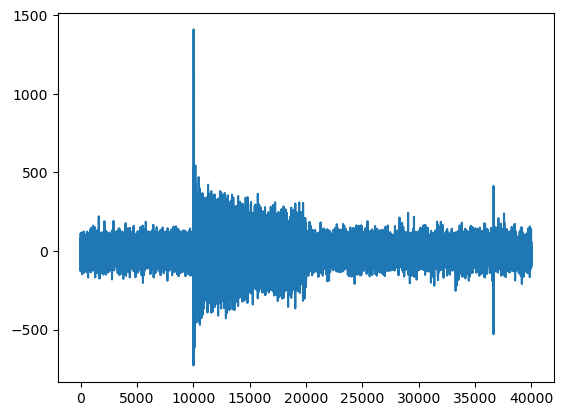

In [74]:
data_plot=np.array(file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][1][80000:120000])
plt.plot(data_plot)

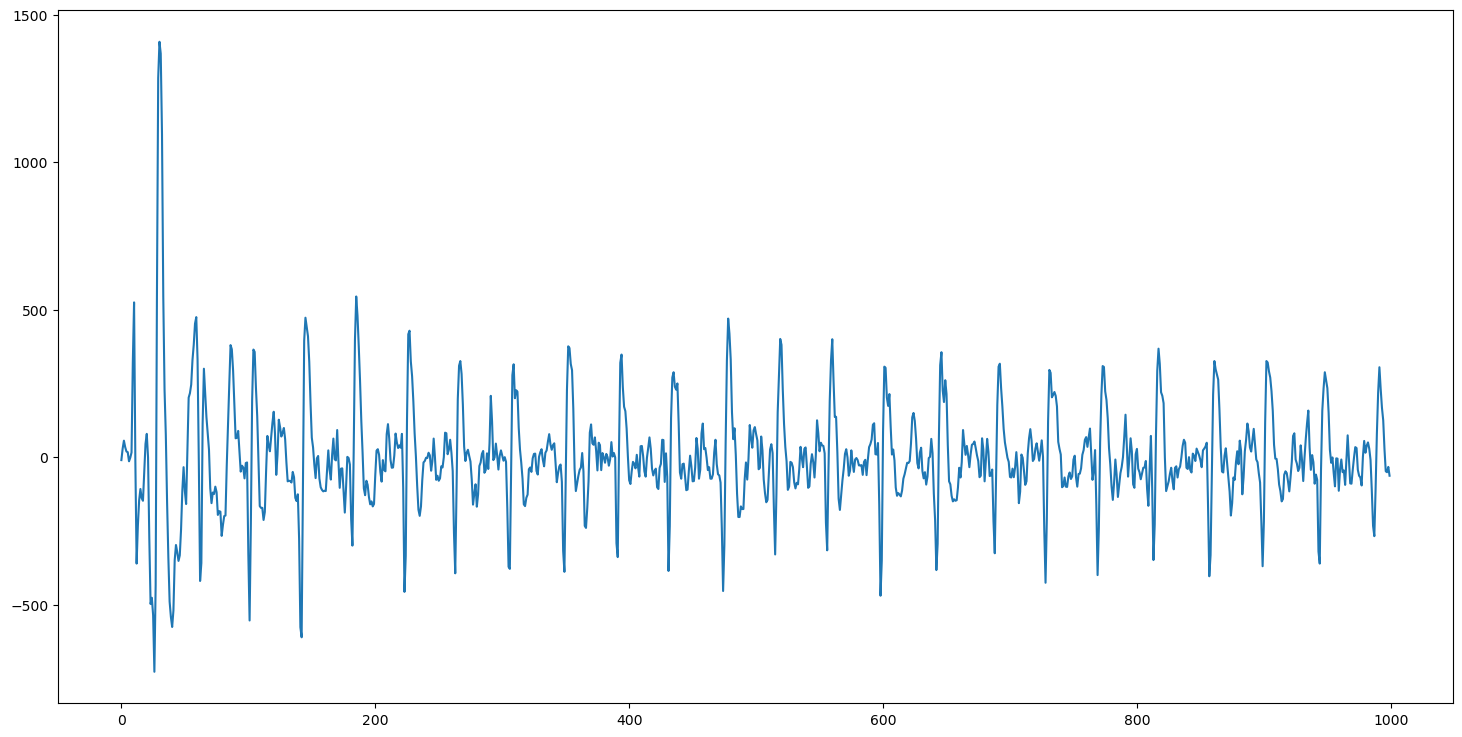

In [79]:
plt.figure(figsize=(18,9))
plt.plot(data_plot[10000:11000])

# L6 Analysis

In [10]:
#WINDOWS
path_file = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\"
#LINUX
#path_file = "/media/yeshua/ZEILER/T_proyect/20230622/datamanager/Rebanada02/"

namefile = "L6.h5"


file_L6 = h5py.File(path_file+namefile)
plot_l6 = np.array(file_L6['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][0])
size_signal = len(plot_l6)

print("Datos")
print("Tamaño señal (puntos): {}".format(size_signal))

Datos
Tamaño señal (puntos): 6000000


Size TTL pulse: 100000
Size signal: 6000000


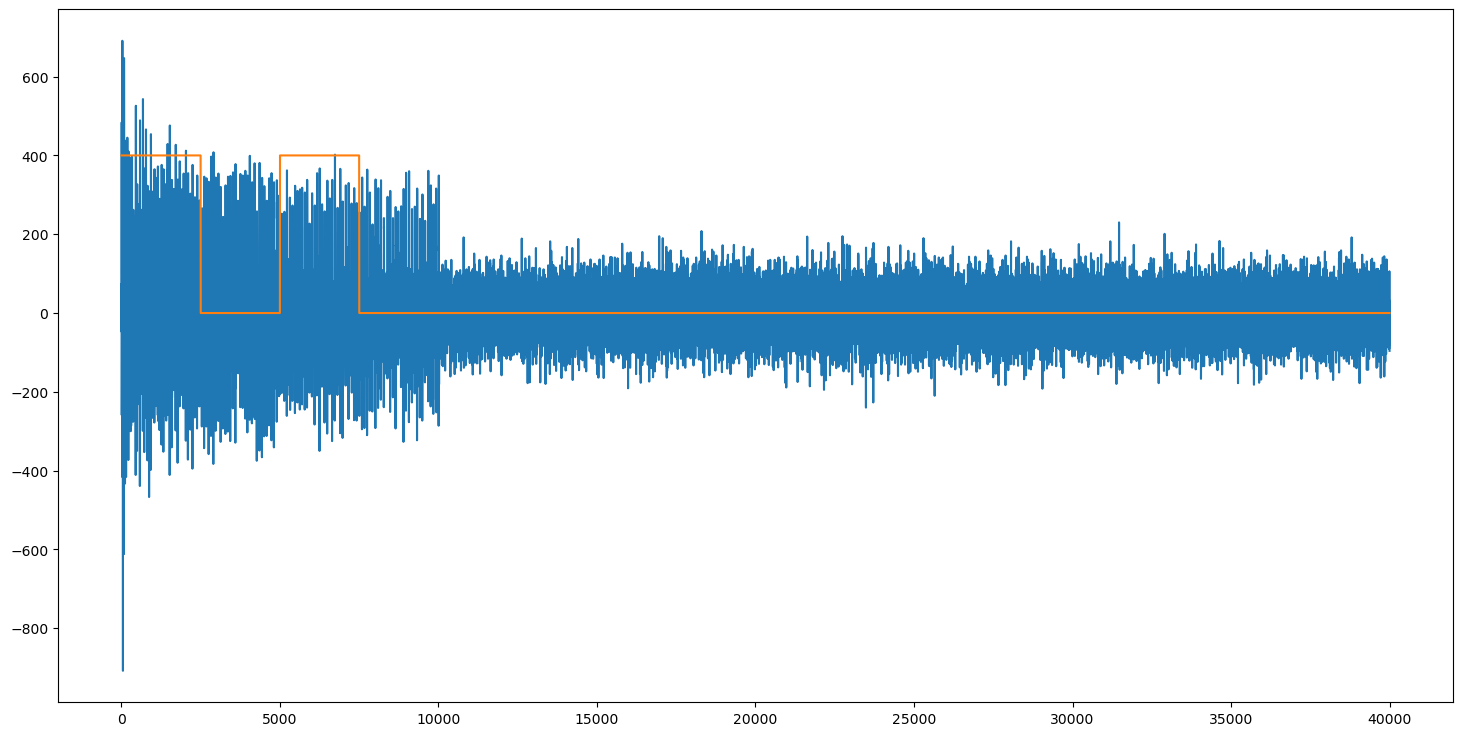

In [11]:
plt.figure(figsize=(18,9))
plt.plot(plot_l6[90000:130000])

st_1s = utiles.StiGen(size_signal,
               10000,
               9,
               250,
               250,
               2)
plt.plot(st_1s[90000:130000]*400)

plt.show()

In [48]:
#crear una funcion que haga un tren de pulsos

frame_rate = 10000#10kHz
zero = 9 # seconds
on_ms = 1000 #miliseconds
off_ms = 0 #miliseconds
n_rep = 1
size_signal = len(plot_l6)
 
first_part = np.zeros(zero * frame_rate, dtype = np.int8)
sec_part = np.array([], dtype = np.int8)
for i in range(0,n_rep):
    
    index = int(on_ms*(1/1000)*frame_rate)
    sec_part = np.concatenate((sec_part, np.ones(index, dtype = np.int8)))
    
    if (off_ms > 0):
        index = int(off_ms*(1/1000)*frame_rate)
        sec_part = np.concatenate((sec_part, np.zeros(index, dtype = np.int8)))

#print("Size 1st part: {}, Size 2nd part: {}".format(len(first_part),len(sec_part)))

sti = np.concatenate((first_part, sec_part), dtype = np.int8) #Poner como una tupla

print("Size TTL pulse : {}".format(len(sti)))

n_rep_tot = int(np.ceil(size_signal/len(sti)))

stimulus = np.array([], dtype = np.int8)
for i in range(0,n_rep_tot):
    stimulus = np.concatenate((stimulus,sti))

print("Size signal: {}".format(len(stimulus)))

Size TTL pulse : 100000
Size signal: 6000000


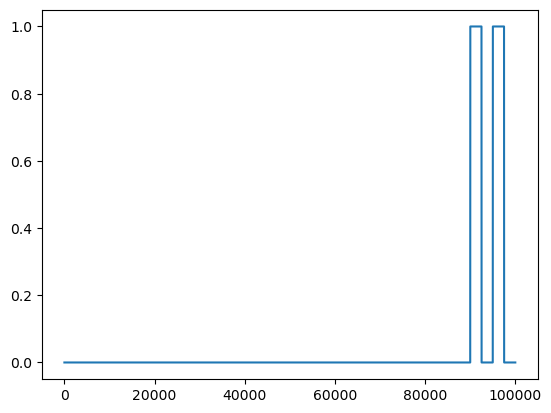

In [13]:
#stimulus = stimulus
plt.plot(st_1s[:100000])

In [78]:
def StiGen(size_signal, frame_rate = 10000, zero = 9, on_ms = 1000, off_ms =0, n_rep = 1):
    
    #size_signal: tamaño de la señal
    #frame_rate: tasa de adquisición
    #zero: tiempo[s] del estímulo apagado
    #on_ms : tiempo[ms] estímulo encendido (tren de pulsos)
    #off_ms : tiempo[ms] estímulo apagado (tren de pulsos)
    #n_rep : número de repeticiones del pulso
    
    first_part = np.zeros(zero * frame_rate, dtype = np.int8)
    
    for i in range(0,n_rep):
        index = int(on_ms*(1/1000)*frame_rate)
        if i == 0:
            sec_part = np.ones(index, dtype = np.int8)
        else:
            sec_part = np.concatenate((sec_part, np.ones(index, dtype = np.int8)))
        if (off_ms > 0):
            index = int(off_ms*(1/1000)*frame_rate)
            sec_part = np.concatenate((sec_part, np.zeros(index, dtype = np.int8)))
    ttl = np.concatenate((first_part, sec_part)) #Poner como una tupla
    print("Size TTL pulse: {}".format(len(ttl)))
    
    n_rep_tot = int(np.ceil(size_signal/len(ttl)))

    stimulus = np.array([], dtype = np.int8)
    for i in range(0,n_rep_tot):
        stimulus = np.concatenate((stimulus,ttl))
    
    print("Size signal: {}".format(len(stimulus)))
    if len(stimulus) > size_signal:
        return stimulus[0:size_signal]
    else:
        return stimulus

In [60]:
print(sys.getsizeof(stimulus)) # tamaño de la variable en memoria
stimulus.dtype

12000112


dtype('int16')